In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

%matplotlib inline

In [7]:
### Research work ----python ; ## > 10 data tableau

In [8]:
! pip install folium

In [9]:
import folium

In [10]:
df = pd.read_csv("supermarket_sales.csv")

In [11]:
df.shape

(1000, 20)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   806 non-null    object 
 2   CustomerID               1000 non-null   object 
 3   City                     1000 non-null   object 
 4   Customer type            952 non-null    object 
 5   Gender                   975 non-null    object 
 6   Product line             977 non-null    object 
 7   Unit price               1000 non-null   float64
 8   Quantity                 1000 non-null   int64  
 9   Tax 5%                   896 non-null    float64
 10  Total                    1000 non-null   float64
 11  Date                     1000 non-null   object 
 12  Time                     1000 non-null   object 
 13  Payment                  979 non-null    object 
 14  cogs                     

In [13]:
df.head(20).style.background_gradient(cmap = 'YlGnBu_r')

,Invoice ID,Branch,CustomerID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
0,750-67-8428,A,C1888,Yangon,Member,Female,Health and beauty,74.690000,10,37.345000,746.900000,21-02-2019,13:08,Ewallet,711.333333,4.761905,35.566667,9.100000,96.173500,16.840900
1,226-31-3081,C,C1475,Naypyitaw,Normal,Female,Health and beauty,15.280000,6,4.584000,91.680000,27-05-2019,10:29,Cash,76.400000,4.761905,15.280000,10.000000,96.078500,19.763300
2,631-41-3108,A,C1746,Yangon,Normal,Male,Health and beauty,46.330000,7,16.215500,324.310000,27-12-2019,13:23,Credit card,324.310000,4.761905,0.000000,7.400000,96.173500,16.840900
3,123-19-1176,A,C1896,Yangon,Member,Male,Health and beauty,58.220000,11,32.021000,640.420000,15-11-2019,20:33,Ewallet,465.760000,4.761905,174.660000,8.400000,96.173500,16.840900
4,373-73-7910,A,C1790,Yangon,Normal,Male,Health and beauty,86.310000,7,30.208500,604.170000,31-03-2019,10:37,Ewallet,604.170000,4.761905,0.000000,nan,96.173500,16.840900
5,699-14-3026,C,C1423,Naypyitaw,Normal,Male,Health and beauty,85.390000,8,34.156000,683.120000,06-01-2019,18:30,Ewallet,597.730000,4.761905,85.390000,nan,96.078500,19.763300
6,355-53-5943,A,C1723,Yangon,Normal,Female,Health and beauty,68.840000,6,20.652000,413.040000,15-12-2019,14:36,Ewallet,413.040000,4.761905,0.000000,nan,96.173500,16.840900
7,315-22-5665,C,C1471,Naypyitaw,nan,Female,Health and beauty,73.560000,12,44.136000,882.720000,14-06-2019,11:38,Ewallet,735.600000,4.761905,147.120000,nan,96.078500,19.763300
8,665-32-9167,A,C1707,Yangon,nan,Female,Health and beauty,36.260000,2,3.626000,72.520000,25-11-2019,17:15,Credit card,72.520000,4.761905,0.000000,nan,96.173500,16.840900
9,692-92-5582,B,C1277,Mandalay,nan,Female,Health and beauty,54.840000,4,10.968000,219.360000,10-04-2019,13:27,Credit card,164.520000,4.761905,54.840000,nan,96.089100,21.958800


In [14]:
df.describe().style.background_gradient(cmap = 'YlGnBu_r')

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
count,1000.000000,1000.000000,896.000000,1000.000000,1000.000000,1000.000000,1000.000000,857.000000,1000.000000,1000.000000
mean,55.672130,7.485000,20.966930,419.149340,307.775883,4.761905,111.373457,7.462625,96.114319,19.498590
std,26.494628,4.520643,17.604704,347.824683,234.425682,0.000000,149.212835,1.776179,0.042715,2.106757
min,10.080000,1.000000,0.508500,10.170000,10.170000,4.761905,0.000000,4.000000,96.078500,16.840900
25%,32.875000,4.000000,7.479500,152.745000,118.497500,4.761905,0.000000,5.900000,96.078500,16.840900
50%,55.230000,7.000000,15.468250,317.695000,241.760000,4.761905,63.650000,7.455000,96.089100,19.763300
75%,77.935000,11.000000,30.205875,605.222500,448.905000,4.761905,161.022500,9.100000,96.173500,21.958800
max,99.960000,20.000000,87.498000,1749.960000,993.000000,4.761905,874.980000,10.000000,96.173500,21.958800


In [15]:
df.isna().sum()

Invoice ID                   0
Branch                     194
CustomerID                   0
City                         0
Customer type               48
Gender                      25
Product line                23
Unit price                   0
Quantity                     0
Tax 5%                     104
Total                        0
Date                         0
Time                         0
Payment                     21
cogs                         0
gross margin percentage      0
gross income                 0
Rating                     143
Longitude                    0
Latitude                     0
dtype: int64

In [16]:
df['Rating']=df['Rating'].fillna(df.Rating.mean())

In [17]:
df['Tax 5%']=df['Tax 5%'].fillna(df['Total']*0.05)

In [18]:
df['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card', nan], dtype=object)

In [19]:
def impute_mode(col):
    print("Mode is"+df[col].mode()[0])
    df[col] =df[col].fillna(df[col].mode()[0])

In [20]:
impute_mode('Customer type')

Mode isNormal


In [21]:
impute_mode('Gender')

Mode isFemale


In [22]:
impute_mode('Product line')

Mode isHealth and beauty


In [23]:
df[['Branch','City']].drop_duplicates()

,Branch,City
0,A,Yangon
1,C,Naypyitaw
9,B,Mandalay
178,NaN,Yangon
179,NaN,Naypyitaw
185,NaN,Mandalay


In [24]:
for i in range(len(df['Branch'])):
    if pd.isna(df['Branch'][i]) ==True:
        if(df['City'][i].strip()=='Yangon'):
            df['Branch'][i]="A"
        elif(df['City'][i].strip() =='Naypyitaw'):
            df['Branch'][i]="C"
        elif(df['City'][i].strip()=='Mandalay'):
             df['Branch'][i]="B"
        else:
            print("invalid city")
  

C:\Users\areeb\AppData\Local\Temp\ipykernel_15316\2615913291.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Branch'][i]="A"
C:\Users\areeb\AppData\Local\Temp\ipykernel_15316\2615913291.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Branch'][i]="C"
C:\Users\areeb\AppData\Local\Temp\ipykernel_15316\2615913291.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Branch'][i]="B"


In [69]:
print(df.Date)

0      21-02-2019
1      27-05-2019
2      27-12-2019
3      15-11-2019
4      31-03-2019
          ...    
995    02-10-2019
996    29-12-2019
997    16-01-2019
998    21-03-2019
999    11-10-2019
Name: Date, Length: 1000, dtype: object


In [70]:
df.date =pd.to_datetime(df.Date)

In [72]:
df['month'] = df.date.dt.month
df['year'] =df.date.dt.year
df['day'] =df.date.dt.day
df['weekend'] =df.date.dt.day_name()


In [73]:
df.head()

,Invoice ID,Branch,CustomerID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,...,gross income,Rating,Longitude,Latitude,hour,minute,month,year,day,weekend
0,750-67-8428,A,C1888,Yangon,Member,Female,Health and beauty,74.69,10,37.3450,...,35.566667,9.100000,96.1735,16.8409,13,8,2,2019,21,Thursday
1,226-31-3081,C,C1475,Naypyitaw,Normal,Female,Health and beauty,15.28,6,4.5840,...,15.280000,10.000000,96.0785,19.7633,10,29,5,2019,27,Monday
2,631-41-3108,A,C1746,Yangon,Normal,Male,Health and beauty,46.33,7,16.2155,...,0.000000,7.400000,96.1735,16.8409,13,23,12,2019,27,Friday
3,123-19-1176,A,C1896,Yangon,Member,Male,Health and beauty,58.22,11,32.0210,...,174.660000,8.400000,96.1735,16.8409,20,33,11,2019,15,Friday
4,373-73-7910,A,C1790,Yangon,Normal,Male,Health and beauty,86.31,7,30.2085,...,0.000000,7.462625,96.1735,16.8409,10,37,3,2019,31,Sunday


In [74]:
df['hour']=df.Time.str[0:2]
df['minute']=df.Time.str[3:5]

In [75]:
df['hour']=pd.to_numeric(df['hour'])
df['minute']=pd.to_numeric(df['minute'])

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   CustomerID               1000 non-null   object 
 3   City                     1000 non-null   object 
 4   Customer type            1000 non-null   object 
 5   Gender                   1000 non-null   object 
 6   Product line             1000 non-null   object 
 7   Unit price               1000 non-null   float64
 8   Quantity                 1000 non-null   int64  
 9   Tax 5%                   1000 non-null   float64
 10  Total                    1000 non-null   float64
 11  Date                     1000 non-null   object 
 12  Time                     1000 non-null   object 
 13  Payment                  979 non-null    object 
 14  cogs                     

In [77]:
def uni_quant(col, hue=None):
    fig,axes = plt.subplots(2,1, figsize=(20,12))
    
    axes[0].set_title('Violin Plot for' +col)
    sns.violinplot(df[col],ax=axes[0], color ='pink')
    
    axes[1].set_title('Boxen Plot for' +col)
    sns.stripplot(df[col],ax=axes[1], color ='#4CB391')
                
    plt.tight_layout()   

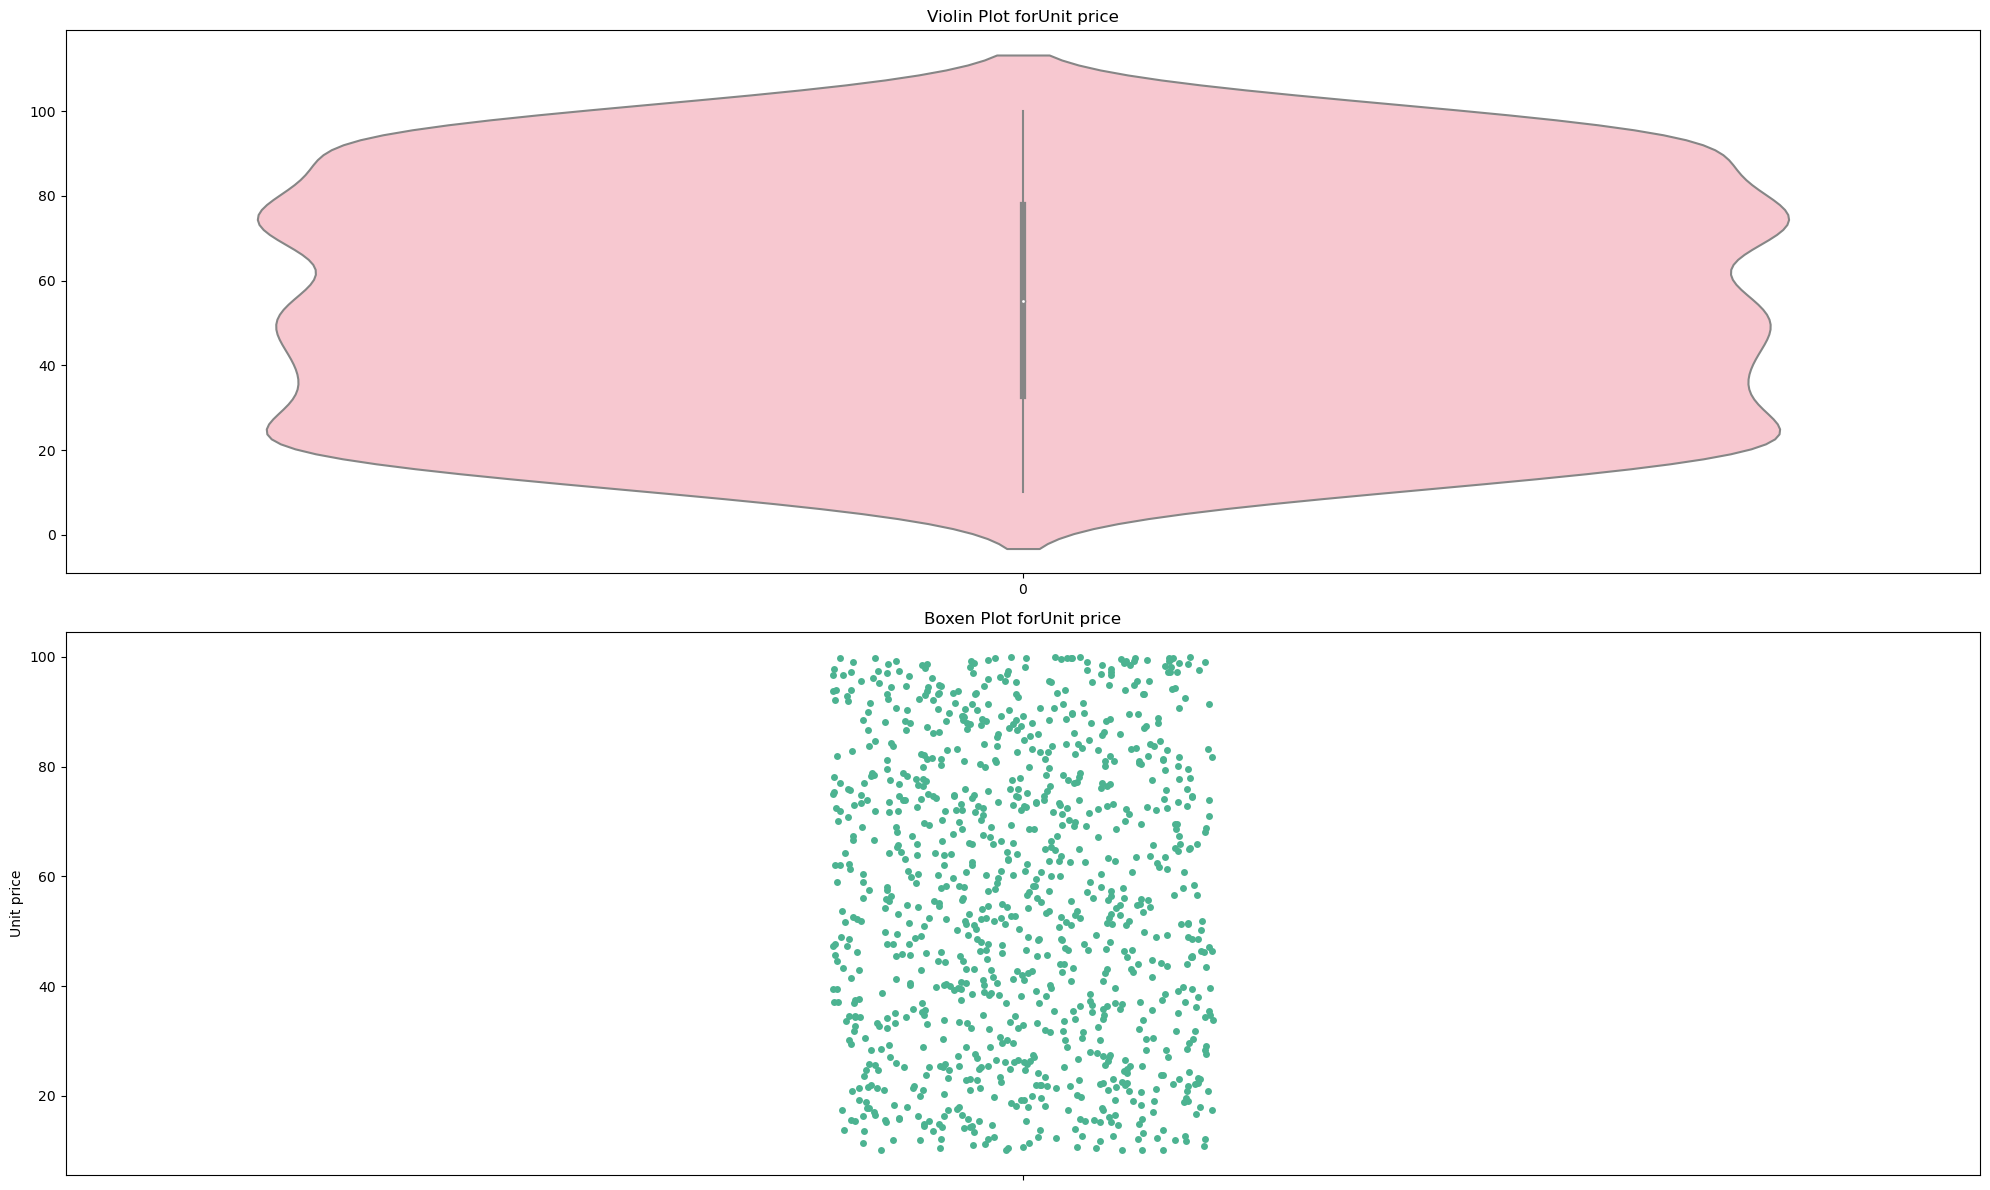

In [78]:
uni_quant('Unit price')

In [79]:
import warnings

warnings.filterwarnings('ignore')

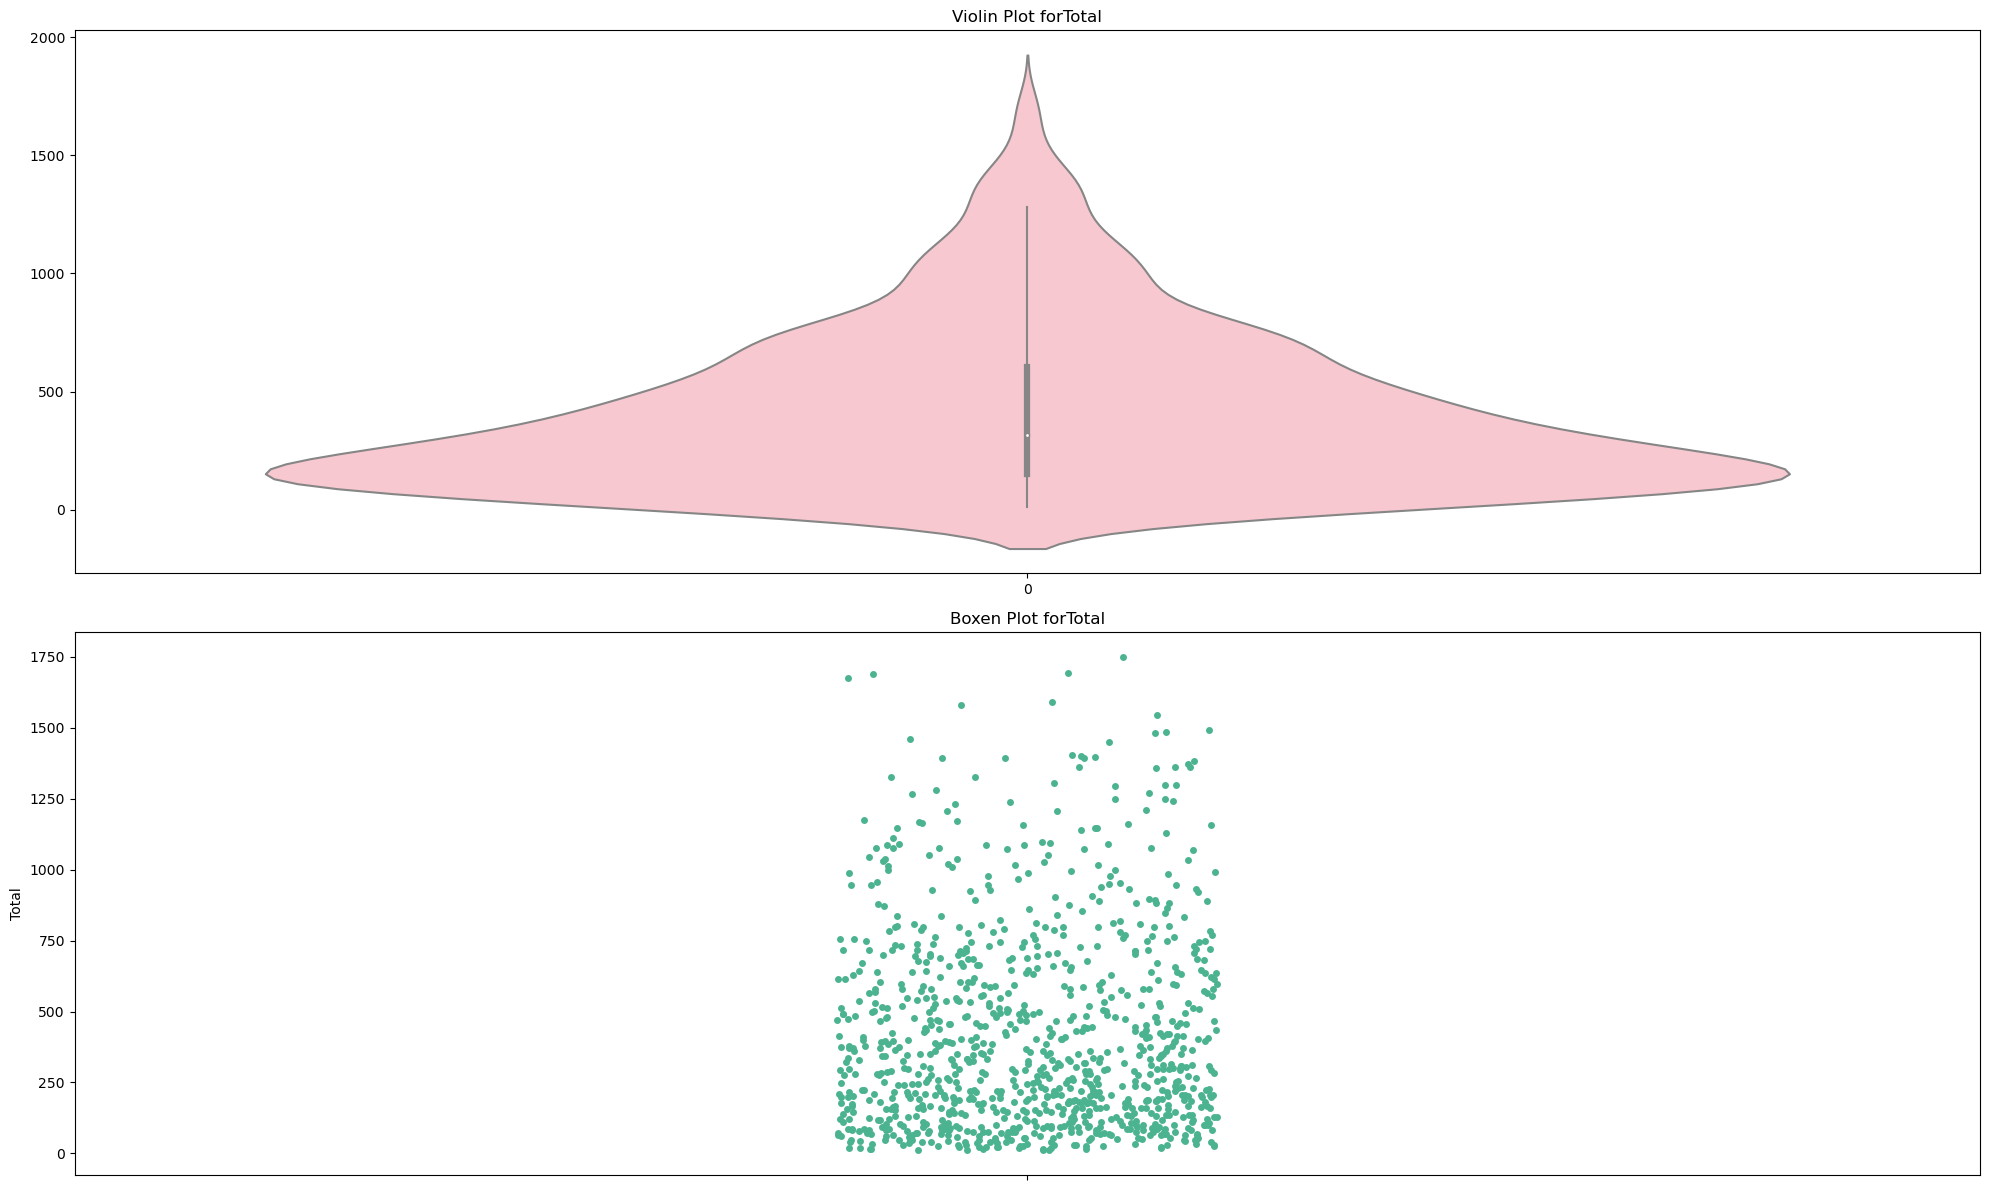

In [80]:
uni_quant('Total')

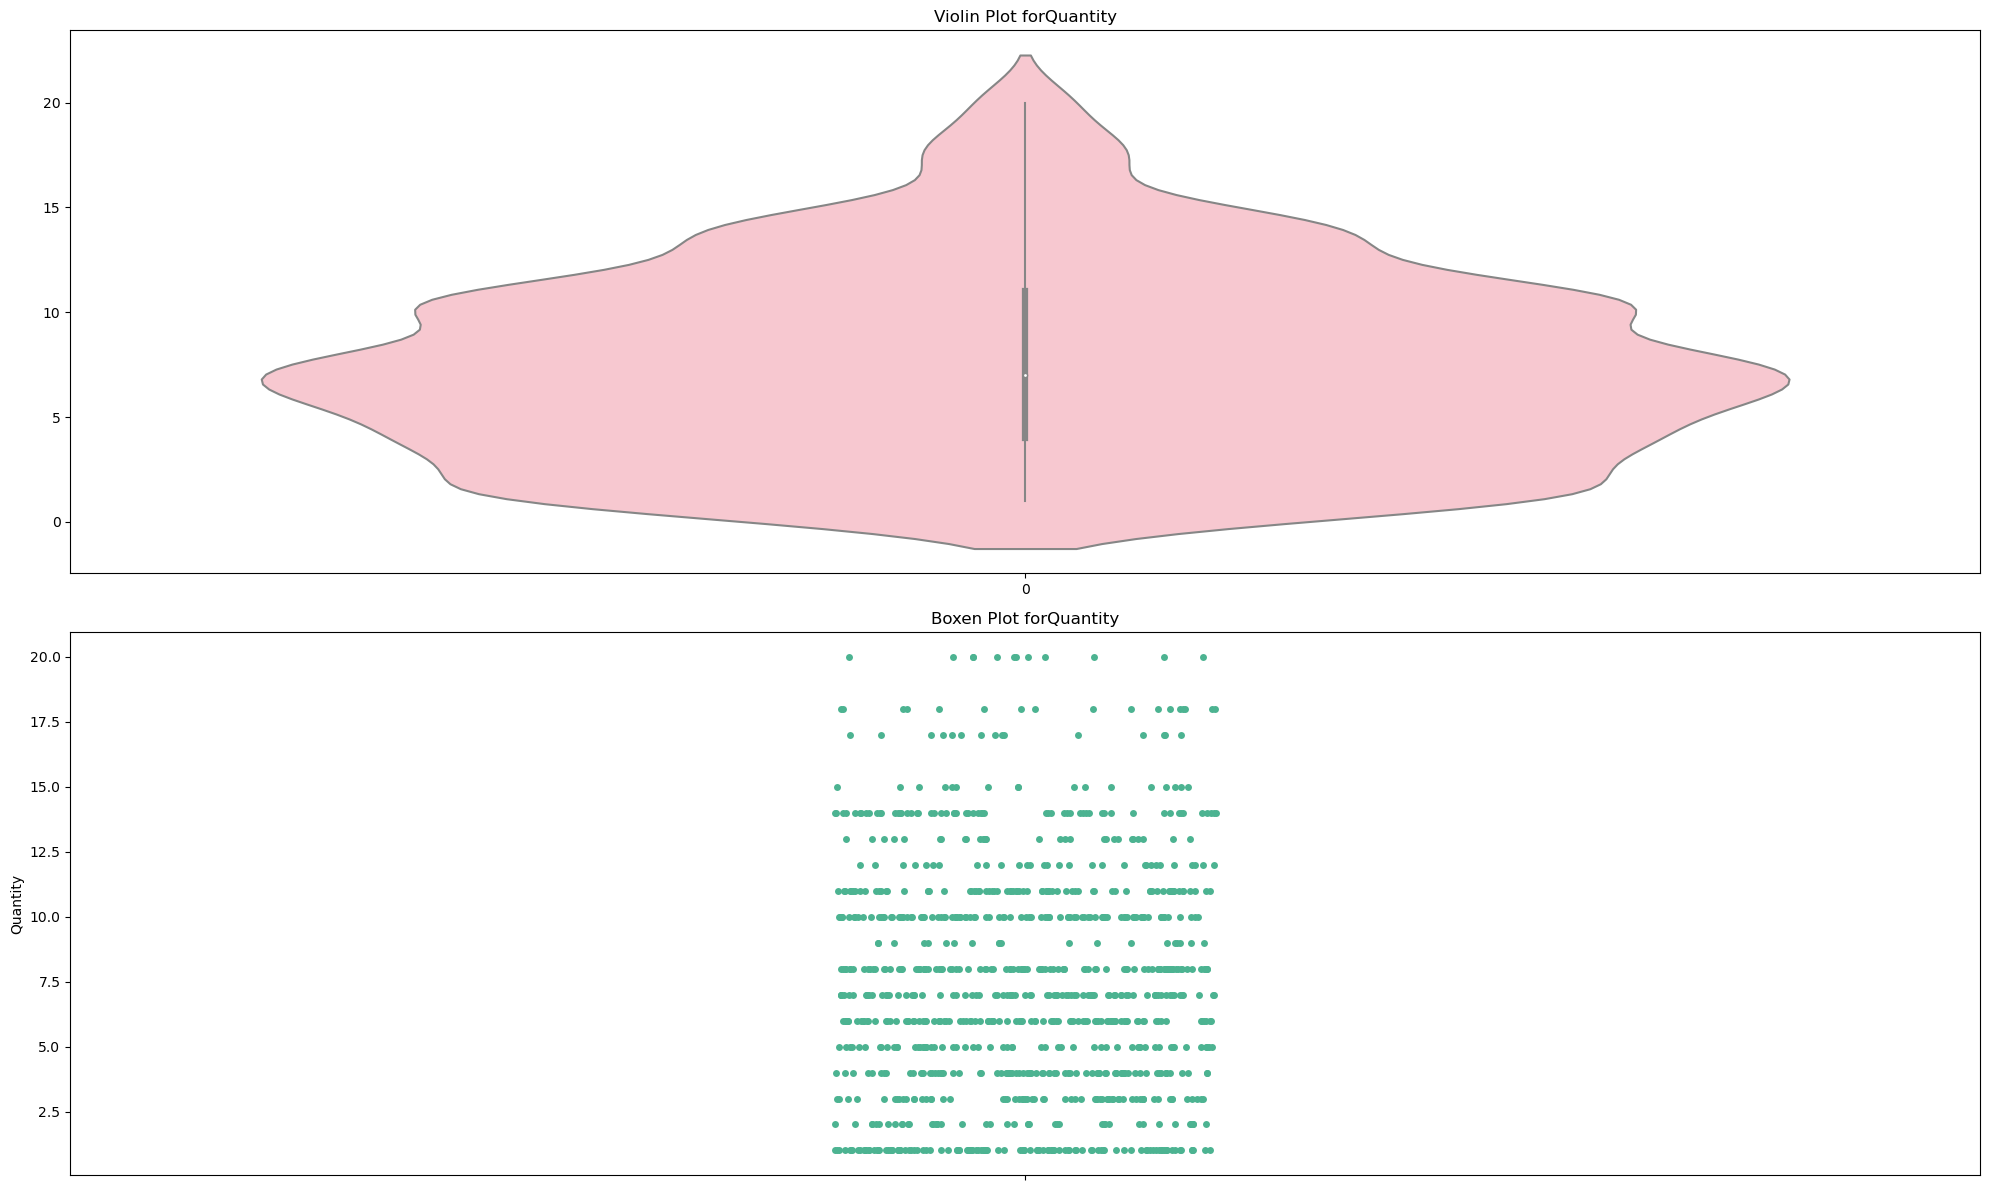

In [81]:
uni_quant('Quantity')

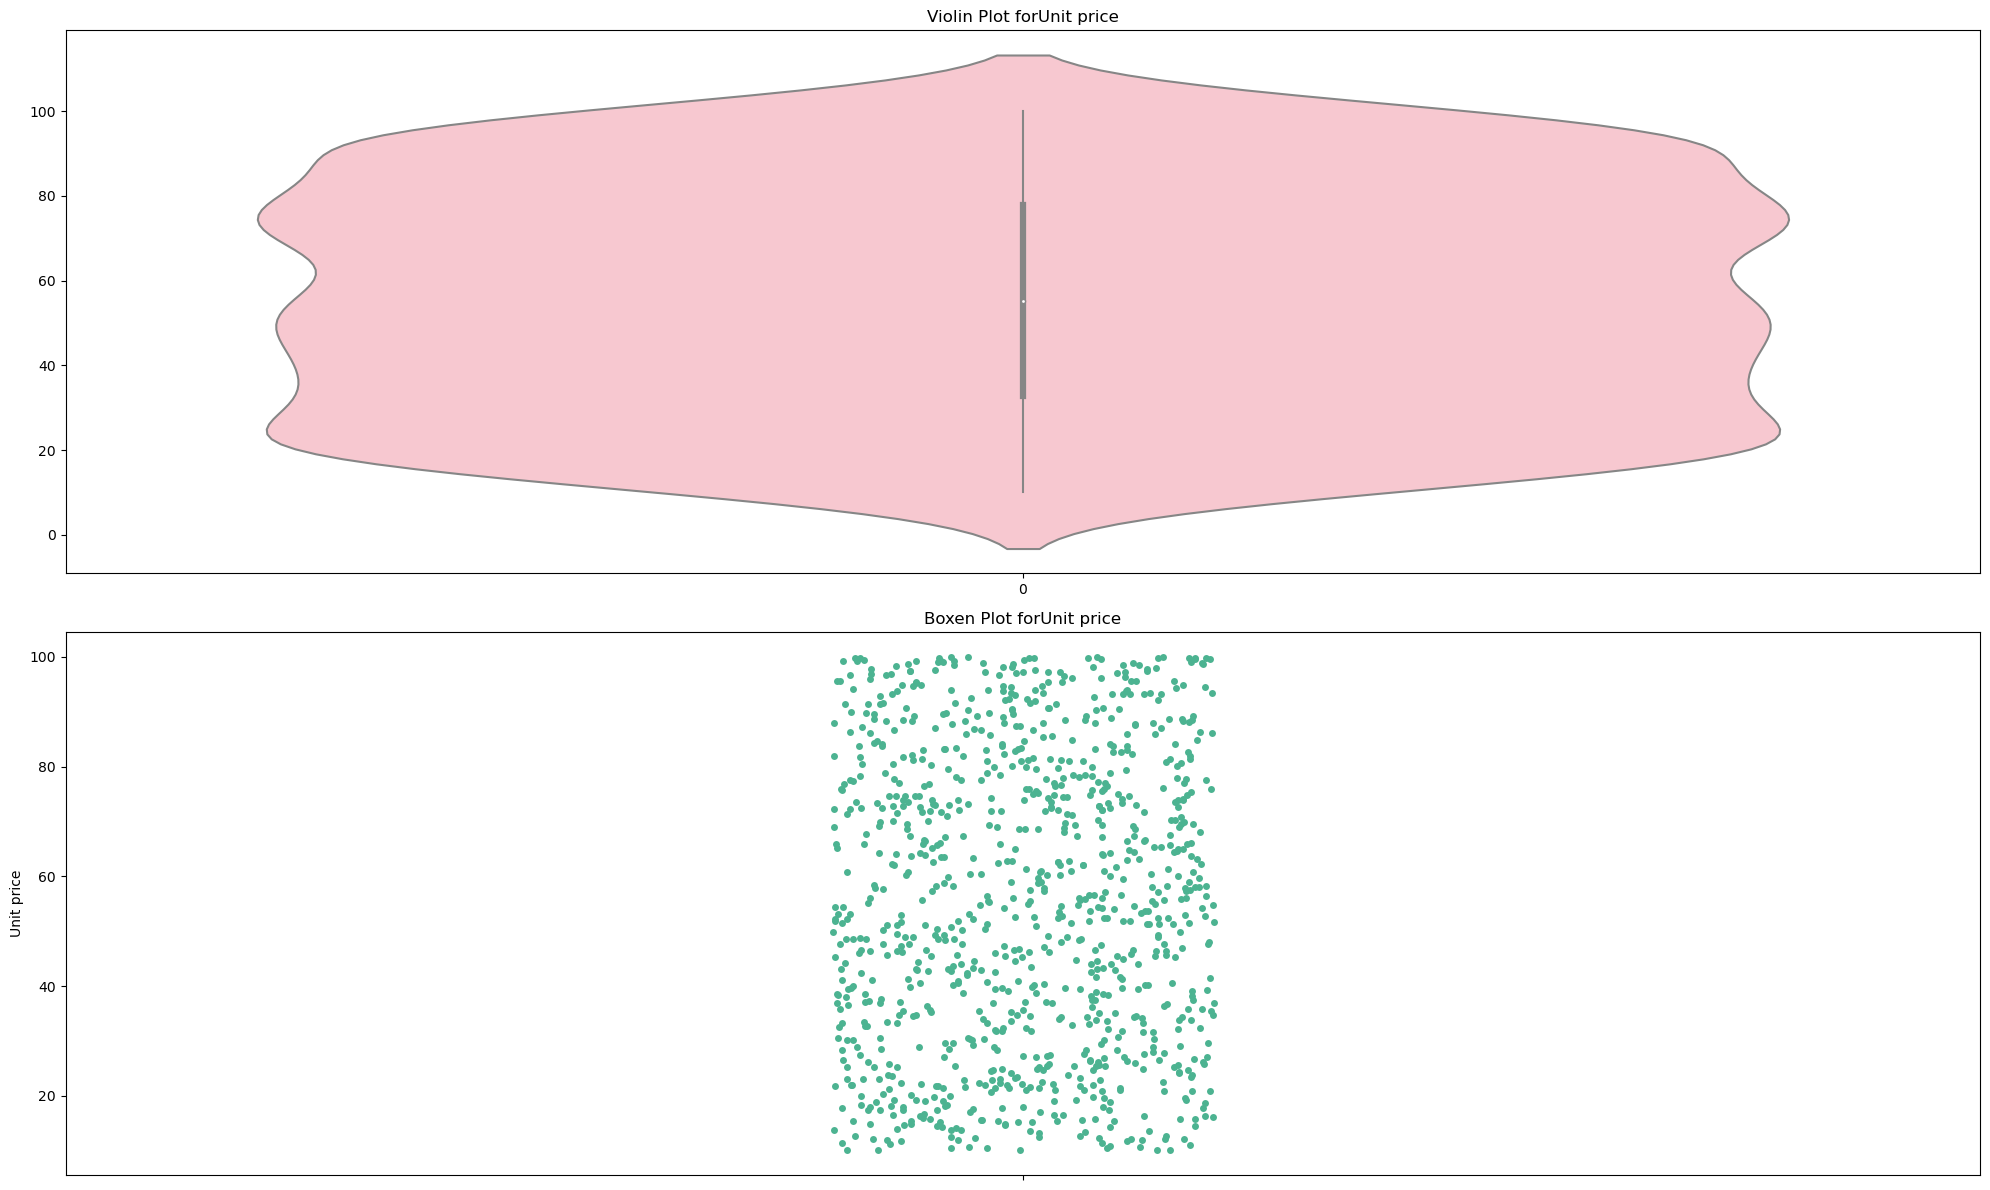

In [82]:
uni_quant('Unit price')

<Axes: >

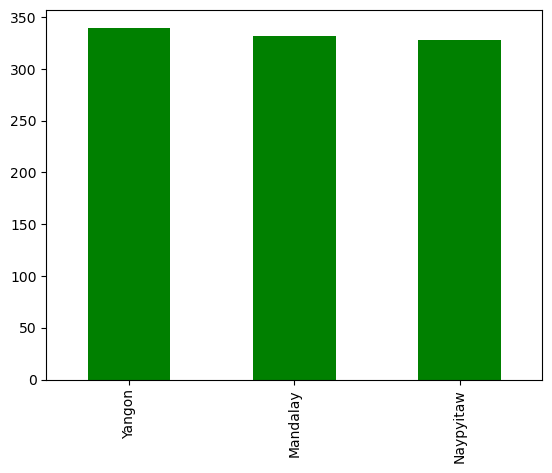

In [83]:
df['City'].value_counts().plot.bar(color ='g')

<Axes: >

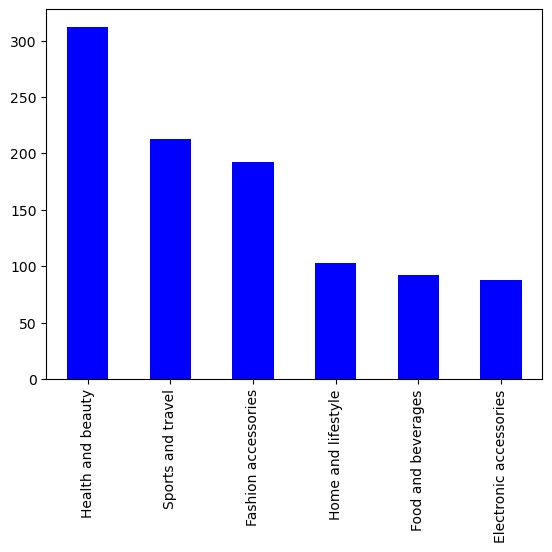

In [84]:
df['Product line'].value_counts().plot.bar(color ='blue')

<Axes: >

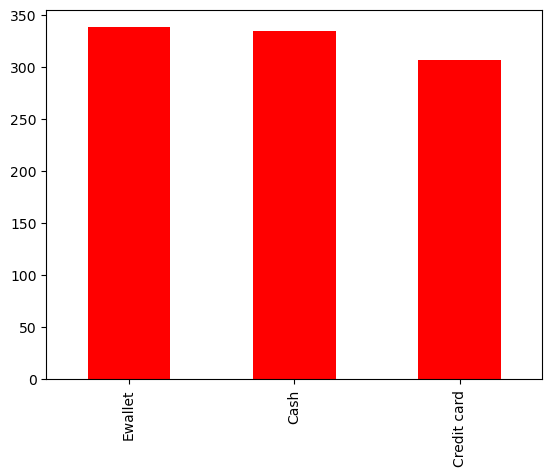

In [85]:
df['Payment'].value_counts().plot.bar(color ='red')

In [86]:
geo = df[['City','Longitude','Latitude']].drop_duplicates()

In [87]:
geo

,City,Longitude,Latitude
0,Yangon,96.1735,16.8409
1,Naypyitaw,96.0785,19.7633
9,Mandalay,96.0891,21.9588


In [88]:
geo_map = folium.Map(location = [16.8409,96.1735], zoom_start = 5, titles='CartoDb Positron',control_scale = True)

<Axes: >

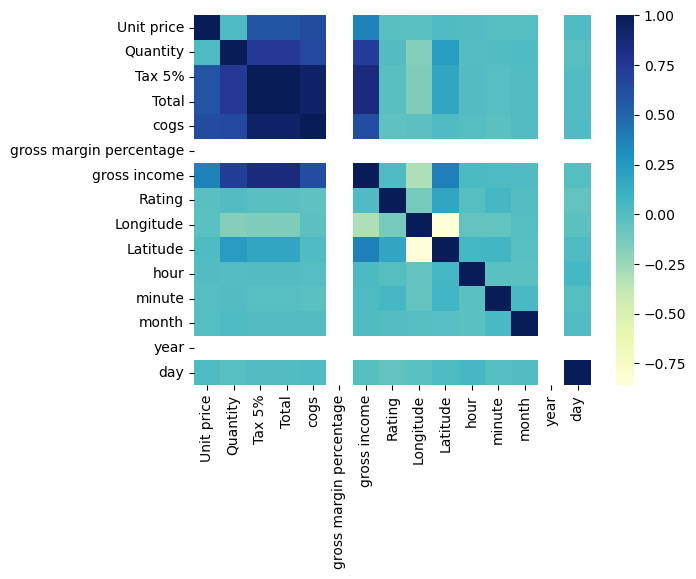

In [89]:
sns.heatmap(df.corr(),cmap='YlGnBu')

<Axes: xlabel='month', ylabel='Total'>

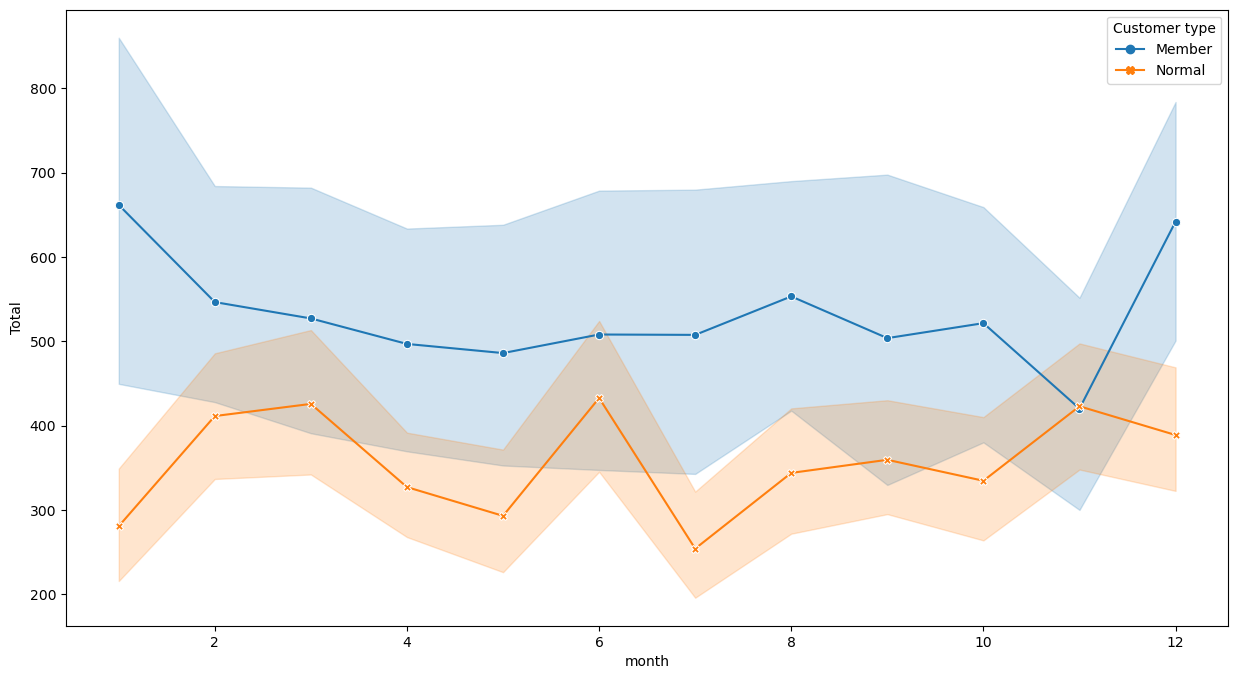

In [90]:
plt.figure(figsize=(15,8))
sns.lineplot(data =df, x= 'month',y='Total',hue='Customer type',markers=True,style='Customer type',dashes=False)

In [91]:
df['month']

0       2
1       5
2      12
3      11
4       3
       ..
995     2
996    12
997     1
998     3
999    11
Name: month, Length: 1000, dtype: int64